# Extended Data Figure 2 - Ye et al. 2023

- import dependencies and load the data

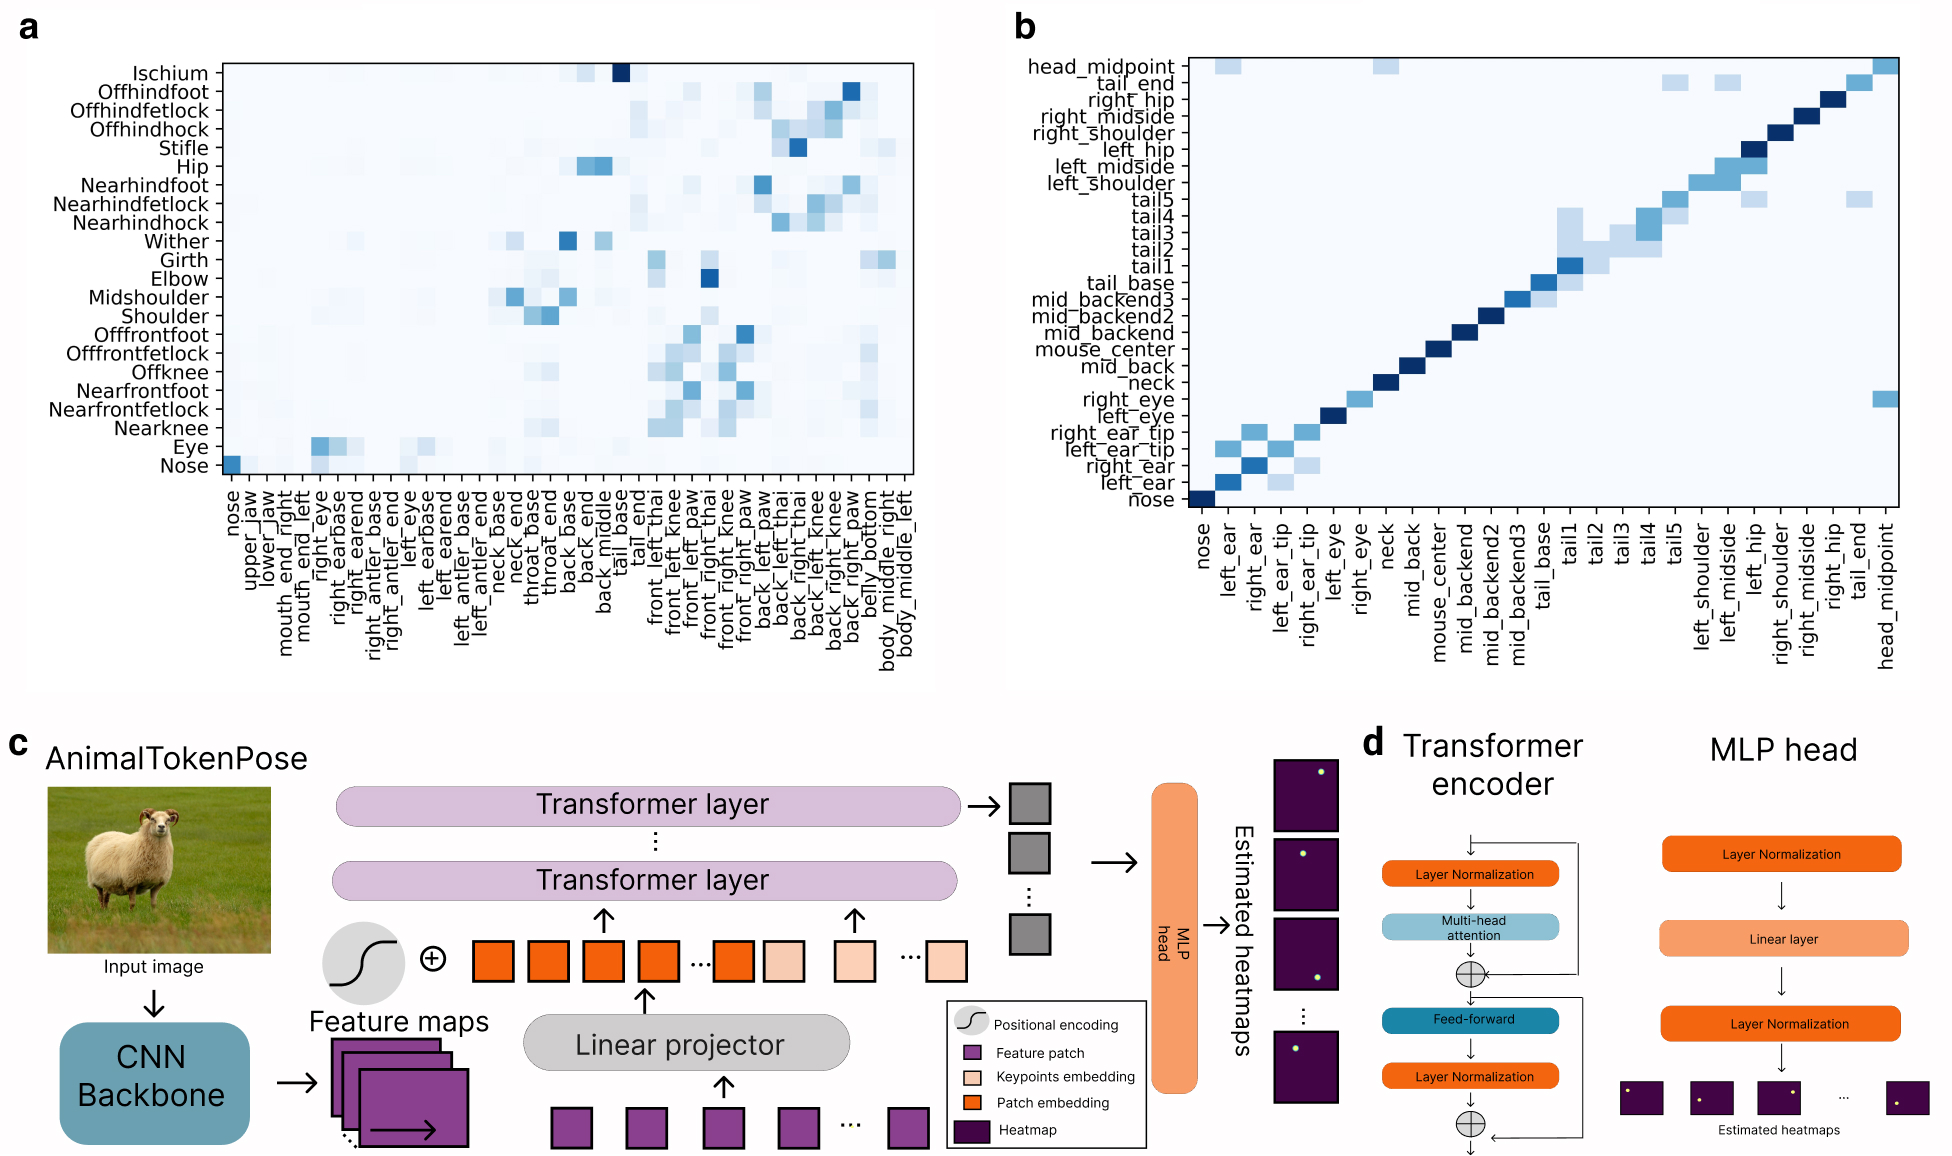

In [1]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.image as mpimg
sns.set_style("ticks")
warnings.filterwarnings('ignore')

## Keypoint matching table for Horse-30

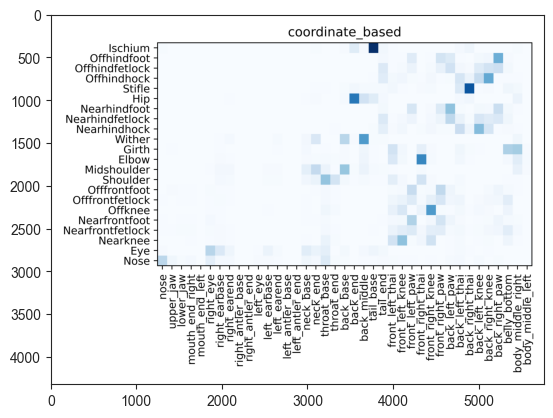

In [2]:
img =  mpimg.imread('../data/Extended_Figure2/matching_table_horse.png')
plt.imshow(img)

## Keypoint matching table for OOD mouse data, Golden Lab

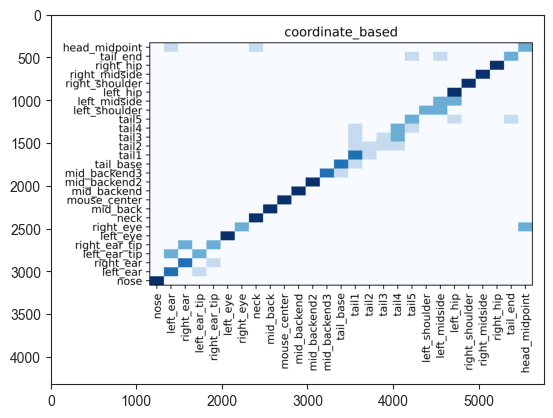

In [3]:
img =  mpimg.imread('../data/Extended_Figure2/matching_table_ood_golden.png')
plt.imshow(img)